In [2496]:
import pandas as pd
import importlib
import mpt_functions as mpt
importlib.reload(mpt)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from datetime import datetime, timedelta
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [2497]:
f1_start = "2020-04-18 00:00:00"
f1_finish = "2020-04-18 23:59:00"
f2_start = "2020-05-29 23:30:00"
f2_finish = "2020-05-30 06:00:00"
f3_start = "2020-06-05 10:00:00"
f3_finish = "2020-06-07 14:30:00"
f4_start = "2020-07-15 14:30:00"
f4_finish = "2020-07-15 19:00:00"
m4_finish = "2020-07-16 00:00:00"

# **************************************************************************************************************#

path = "/Users/esramahmud/IE440/MetroPT3(AirCompressor).csv"
df = mpt.get_the_data_and_convert_datetime(path)

#

df = mpt.drop_a_column(df, "Unnamed: 0")

#

df = df.assign(condition=0)
df = mpt.change_the_values_by_applying_a_time_filter(df, f1_start, f1_finish, "condition", 1)
df = mpt.change_the_values_by_applying_a_time_filter(df, f2_start, f2_finish, "condition", 1)
df = mpt.change_the_values_by_applying_a_time_filter(df, f3_start, f3_finish, "condition", 1)
df = mpt.change_the_values_by_applying_a_time_filter(df, f4_start, f4_finish, "condition", 1)




#

all_column_names = df.columns.to_list()

name_of_the_categorical_columns = ['COMP', 'DV_eletric', 'Towers',
       'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']

name_of_the_numerical_columns =['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs',
       'Oil_temperature', 'Motor_current']

target_column = df["condition"]

#


In [2498]:
df.tail()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,condition
1516943,2020-09-01 03:59:10,-0.014,8.918,8.906,-0.022,8.918,59.675,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1516944,2020-09-01 03:59:20,-0.014,8.904,8.888,-0.020,8.904,59.600,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1516945,2020-09-01 03:59:30,-0.014,8.890,8.876,-0.022,8.892,59.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1516946,2020-09-01 03:59:40,-0.012,8.876,8.864,-0.022,8.878,59.550,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1516947,2020-09-01 03:59:50,-0.014,8.860,8.848,-0.022,8.864,59.475,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0


In [2499]:
window_size = 2000 #(1000 points ≈ 2.6 hours)

f1_finish = pd.Timestamp("2020-04-18 23:59:00")
f2_finish = pd.Timestamp("2020-05-30 06:00:00")
f3_finish = pd.Timestamp("2020-06-07 14:30:00")

post_f1 = df[df['timestamp'] > f1_finish].iloc[:window_size]
post_f2 = df[df['timestamp'] > f2_finish].iloc[:window_size]
post_f3 = df[df['timestamp'] > f3_finish].iloc[:window_size]

In [2500]:
window_size = 1000 #(1000 points ≈ 2.6 hours)

m1_finish = pd.Timestamp("2020-04-19 06:00:00")
m2_finish = pd.Timestamp("2020-05-30 12:00:00")
m3_finish = pd.Timestamp("2020-06-08 16:00:00")

post_m1 = df[df['timestamp'] > m1_finish].iloc[:window_size]
post_m2 = df[df['timestamp'] > m2_finish].iloc[:window_size]
post_m3 = df[df['timestamp'] > m3_finish].iloc[:window_size]

In [2501]:
df2 = mpt.filter_rows_between_the_given_timestamps(df, "2020-06-08 14:30:00", "2020-06-08 19:30:00")["Oil_temperature"]
#df2.to_csv("oil_temperature.csv", index=False)
df2.head()

908907    67.375
908908    67.150
908909    67.025
908910    66.925
908911    66.800
Name: Oil_temperature, dtype: float64

In [2502]:
"""m1_finish = pd.Timestamp("2020-04-19 06:00:00")
m2_finish = pd.Timestamp("2020-05-30 12:00:00")
m3_finish = pd.Timestamp("2020-06-08 16:00:00")"""

'm1_finish = pd.Timestamp("2020-04-19 06:00:00")\nm2_finish = pd.Timestamp("2020-05-30 12:00:00")\nm3_finish = pd.Timestamp("2020-06-08 16:00:00")'

In [2503]:
df_num = df.copy()
df_num = df_num.drop(name_of_the_categorical_columns, axis=1)
df_num = df_num.drop(['condition'], axis=1)
df_m1 = mpt.filter_rows_between_the_given_timestamps(df_num, "2020-04-19 06:00:00", "2020-04-19 11:00:00")

In [2504]:
df_m1.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current
573245,2020-04-19 06:00:03,-0.014,8.864,8.850,-0.022,8.864,56.425,0.0425
573246,2020-04-19 06:00:12,-0.014,8.850,8.836,-0.024,8.848,56.300,0.0450
573247,2020-04-19 06:00:22,-0.014,8.836,8.824,-0.024,8.836,56.225,0.0425
573248,2020-04-19 06:00:32,-0.014,8.822,8.810,-0.024,8.826,56.200,0.0425
573249,2020-04-19 06:00:42,-0.014,8.810,8.796,-0.024,8.808,56.125,0.0450


In [2505]:
df_m2 = mpt.filter_rows_between_the_given_timestamps(df_num, "2020-05-30 12:00:00", "2020-05-30 17:00:00")

In [2506]:
df_m2.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current
845180,2020-05-30 12:00:09,-0.012,9.832,9.822,-0.02,9.832,69.475,3.7050
845181,2020-05-30 12:00:18,-0.012,9.814,9.804,-0.02,9.814,69.225,3.7725
845182,2020-05-30 12:00:28,-0.012,9.794,9.784,-0.02,9.796,69.100,3.8125
845183,2020-05-30 12:00:38,-0.012,9.776,9.764,-0.02,9.778,68.825,3.7325
845184,2020-05-30 12:00:48,-0.014,9.758,9.746,-0.02,9.760,68.550,3.7075


In [2507]:
df_m3 = mpt.filter_rows_between_the_given_timestamps(df_num, "2020-06-08 16:00:00", "2020-06-08 23:00:00")

In [2508]:
df_m3.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current
909451,2020-06-08 16:00:01,-0.010,9.186,9.174,-0.018,9.190,67.125,0.0450
909452,2020-06-08 16:00:11,-0.012,9.166,9.156,-0.018,9.170,67.050,0.0450
909453,2020-06-08 16:00:21,-0.010,9.150,9.136,-0.016,9.154,66.775,0.0425
909454,2020-06-08 16:00:31,-0.010,9.128,9.118,-0.020,9.132,66.450,0.0425
909455,2020-06-08 16:00:41,-0.010,9.112,9.098,-0.018,9.114,65.950,0.0450


In [2509]:
df_m1.to_csv("df_m1_num.csv", index=False)
df_m2.to_csv("df_m2_num.csv", index=False)
df_m3.to_csv("df_m3_num.csv", index=False)

In [2510]:
"""for i in name_of_the_numerical_columns:
    mpt.plot_columns(mpt.filter_rows_between_the_given_timestamps(df, "2020-04-17 22:00:00", "2020-04-18 00:00:00"), "timestamp", i)"""

'for i in name_of_the_numerical_columns:\n    mpt.plot_columns(mpt.filter_rows_between_the_given_timestamps(df, "2020-04-17 22:00:00", "2020-04-18 00:00:00"), "timestamp", i)'

HEALTHY DATA SIMULATION
ALL NUMERICAL FEATURES

In [2511]:
from scipy.signal import find_peaks

# === Step 1: Load your new dataset ===
df_all_simu = pd.read_csv("df_m3_num.csv")  # Ensure the file is in the same directory
df_all_simu["timestamp"] = pd.to_datetime(df_all_simu["timestamp"])

# === Step 2: Detect valleys in Oil_temperature to define cycle boundaries ===
inverted_temp = -df_all_simu["Oil_temperature"].values
valley_indices, _ = find_peaks(inverted_temp, distance=80, prominence=0.1)

# === Step 3: Extract cycle segments ===
cycle_segments = []
for i in range(len(valley_indices) - 1):
    start, end = valley_indices[i], valley_indices[i + 1]
    segment = df_all_simu.iloc[start:end].reset_index(drop=True)
    cycle_segments.append(segment)

# === Step 4: Choose a representative (median-length) cycle ===
cycle_lengths = [len(seg) for seg in cycle_segments]
median_idx = np.argsort(cycle_lengths)[len(cycle_lengths) // 2]
template_segment = cycle_segments[median_idx]

# === Step 5: Define the simulation function ===
def simulate_from_template(df_template, n_cycles, noise_std=0.01, scale_std=0.005, shift_std=0.01):
    simulated_data = []
    for _ in range(n_cycles):
        new_cycle = pd.DataFrame()
        for col in df_template.columns:
            if col == "timestamp":
                continue  # timestamp will be regenerated
            series = df_template[col].values
            noise = np.random.normal(0, noise_std, size=len(series))
            scale = np.random.normal(1.0, scale_std)
            shift = np.random.normal(0, shift_std)
            new_cycle[col] = series * scale + shift + noise
        simulated_data.append(new_cycle)
    full_simulated = pd.concat(simulated_data, ignore_index=True)
    return full_simulated

# === Step 6: Simulate 30 new cycles ===
n_cycles = 30
simulated_df3 = simulate_from_template(template_segment, n_cycles)

# === Step 7: Generate timestamps ===
start_time = pd.to_datetime("2020-01-01 00:00")
simulated_df3["timestamp"] = pd.date_range(start=start_time, periods=len(simulated_df3), freq="1min")

# === Step 8: Reorder columns and save to CSV ===
cols = ["timestamp"] + [col for col in simulated_df3.columns if col != "timestamp"]
simulated_df3 = simulated_df3[cols]
simulated_df3.to_csv("simulated_all_variables_new.csv", index=False)

print("✅ Simulated data saved as 'simulated_all_variables_new.csv'")

✅ Simulated data saved as 'simulated_all_variables_new.csv'


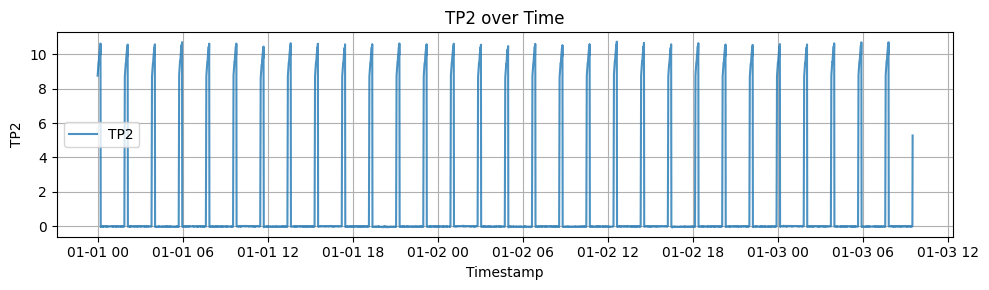

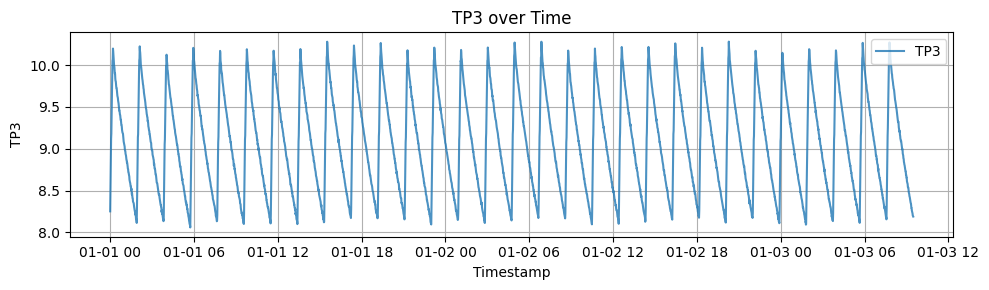

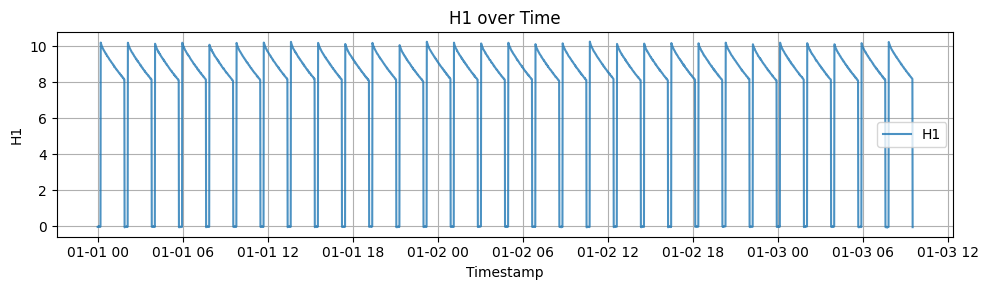

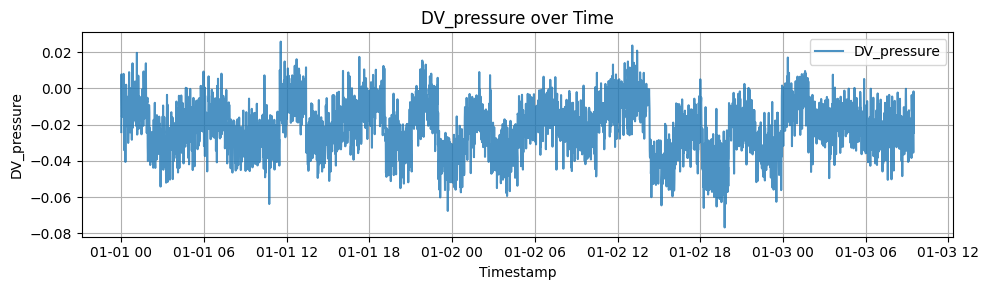

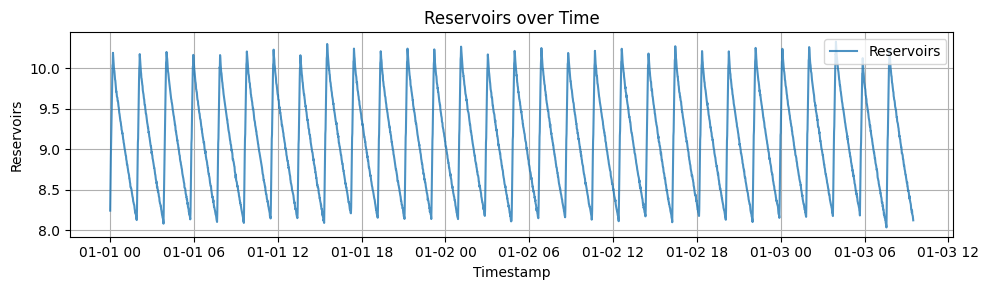

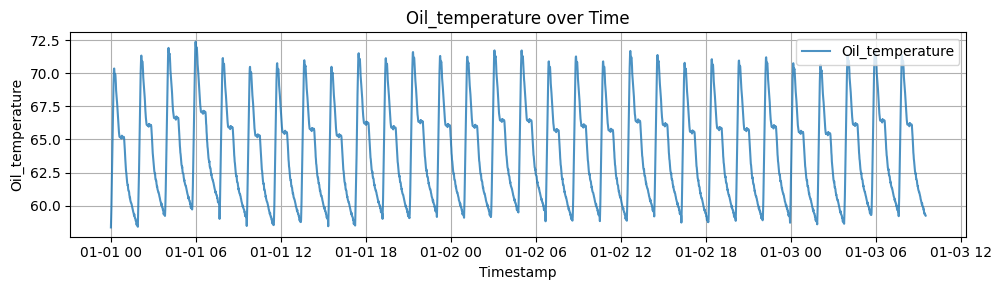

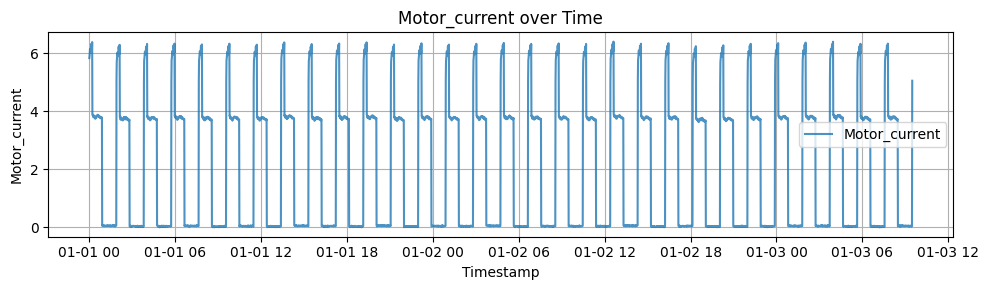

In [2512]:
# Plot each column separately
for col in simulated_df3.columns:
    if col == "timestamp":
        continue  # Skip timestamp column
    plt.figure(figsize=(10, 3))
    plt.plot(simulated_df3["timestamp"], simulated_df3[col], label=col, alpha=0.8)
    plt.title(f"{col} over Time")
    plt.xlabel("Timestamp")
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()

DRIFT ANALYSIS FOR NUMERICAL VARIABLES

Oil Temperature

In [2513]:
# Get N points *before* the failure starts (e.g., last 2 hours before failure)
n_drift_points = 200
pre_f1_drift = df[df["timestamp"] < f1_start].iloc[-n_drift_points:]

# Extract the drift pattern from Oil_temperature
real_drift_pattern_f1 = pre_f1_drift["Oil_temperature"].values

In [2514]:
# Get N points *before* the failure starts (e.g., last 2 hours before failure)
n_drift_points = 1080
pre_f2_drift = df[df["timestamp"] < f2_start].iloc[-n_drift_points:]

# Extract the drift pattern from Oil_temperature
real_drift_pattern_f2 = pre_f2_drift["Oil_temperature"].values

In [2515]:
# Get N points *before* the failure starts (e.g., last 2 hours before failure)
n_drift_points = 200
pre_f3_drift = df[df["timestamp"] < f3_start].iloc[-n_drift_points:]

# Extract the drift pattern from Oil_temperature
real_drift_pattern_f3 = pre_f3_drift["Oil_temperature"].values

failure 1

In [2516]:
print(real_drift_pattern_f1[:10])  # or pre_f2, pre_f3
print(real_drift_pattern_f1[-10:])

[49.45 49.45 49.45 49.45 49.45 49.45 49.45 49.45 49.45 49.45]
[49.45 49.45 49.45 49.45 49.45 49.45 49.45 49.45 49.45 49.45]


failure 2

In [2517]:
print(real_drift_pattern_f2[:10])
print(real_drift_pattern_f2[-10:])

[61.475 61.275 61.25  61.4   61.075 61.05  61.05  60.85  60.875 60.825]
[73.15  72.95  73.1   73.1   73.2   73.5   73.225 73.15  73.125 73.15 ]


failure 3

In [2518]:
print(real_drift_pattern_f3[:10])
print(real_drift_pattern_f3[-10:])

[60.275 60.075 60.05  59.975 59.9   59.9   59.75  59.825 59.65  59.575]
[73.625 73.65  73.55  73.625 73.75  73.525 73.475 73.45  73.775 74.1  ]


In [2519]:
"""# Normalize drift to start at 0
real_drift_f3 = real_drift_pattern_f3 - real_drift_pattern_f3[0]
"""

diffs = np.diff(real_drift_pattern_f3, prepend=real_drift_pattern_f3[0])

real_drift_f3 = np.cumsum(diffs)

In [2520]:
"""# Optionally smooth with moving average
real_drift_f3 = pd.Series(diffs).rolling(window=10, min_periods=1).mean().cumsum().values"""

'# Optionally smooth with moving average\nreal_drift_f3 = pd.Series(diffs).rolling(window=10, min_periods=1).mean().cumsum().values'

In [2521]:
print(real_drift_f3)

[ 0.    -0.2   -0.225 -0.3   -0.375 -0.375 -0.525 -0.45  -0.625 -0.7
 -0.625 -0.8   -0.925 -1.075 -1.15  -1.3   -1.3   -1.225 -1.4   -1.475
 -1.575 -1.45  -0.725  0.3    1.375  2.575  3.775  4.675  5.45   5.4
  6.275  7.4    8.875 10.05  10.675 11.075 10.975 10.575  9.275  8.55
  8.675  9.125  9.575  9.775  9.775  9.45   9.     8.575  8.375  8.325
  8.25   8.15   7.875  7.475  7.125  7.2    7.625  7.775  7.8    7.925
  7.525  7.15   7.15   7.275  7.25   7.275  7.7    8.075  8.35   8.275
  8.2    7.75   7.55   7.675  7.575  7.575  7.35   6.975  6.475  5.975
  5.5    5.175  4.775  4.5    4.5    4.125  4.     3.725  3.5    3.4
  3.2    2.975  2.9    2.65   2.6    2.5    2.575  2.575  2.475  2.45
  2.425  2.35   2.1    1.975  1.975  1.875  1.85   1.8    1.7    1.7
  1.675  1.5    1.4    1.425  1.325  1.2    1.1    1.075  1.     0.9
  0.825  0.8    0.75   0.7    0.725  0.65   0.575  0.4    0.325  0.3
  0.3    0.2    0.7    1.6    2.5    3.6    4.4    5.475  6.45   7.7
  9.125 10.575 11.425 

In [2522]:
from statsmodels.tsa.seasonal import seasonal_decompose

series = pd.Series(real_drift_f3)
result = seasonal_decompose(series, model='additive', period=100)
real_drift_smooth = result.trend.fillna(method="bfill").fillna(method="ffill").values

/var/folders/w_/6z0yg07x2r55vcqc8x8z370m0000gn/T/ipykernel_75867/4214120813.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  real_drift_smooth = result.trend.fillna(method="bfill").fillna(method="ffill").values


In [2523]:
from scipy.interpolate import interp1d

# Interpolate real drift to the same length as simulated_df
interp_func = interp1d(
    np.linspace(0, 1, len(real_drift_f3)),
    real_drift_smooth,
    kind="linear"
)
drift_scaled = interp_func(np.linspace(0, 1, len(simulated_df3)))

In [2524]:
print(drift_scaled.tolist())

[4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000000008, 4.867625000

In [2525]:
print(drift_scaled)

[4.867625 4.867625 4.867625 ... 8.226875 8.226875 8.226875]


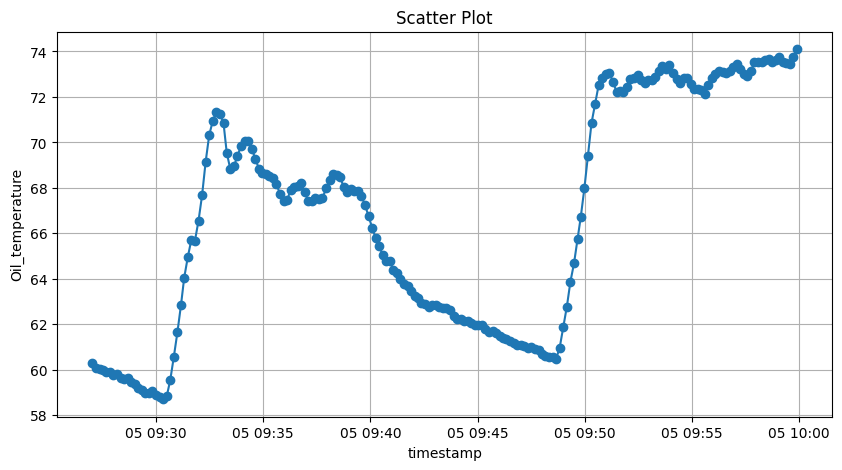

In [2526]:
mpt.plot_columns(pre_f3_drift, "timestamp", "Oil_temperature")

In [2527]:
# Define amplification factor
amplification_factor = 1.30  # You can try 2.0, 3.0, etc.

# Apply the amplified drift
simulated_df3["Oil_temperature_with_drift"] = simulated_df3["Oil_temperature"] + amplification_factor * drift_scaled

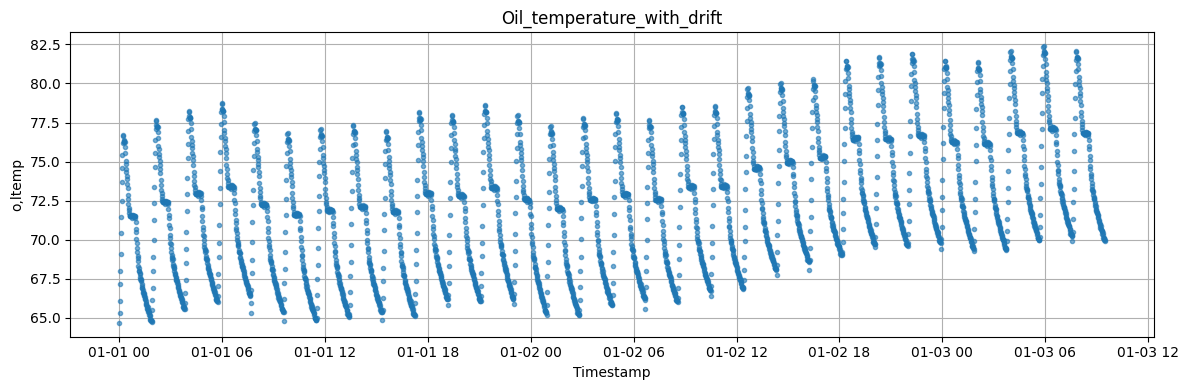

In [2528]:
plt.figure(figsize=(12, 4))
plt.plot(simulated_df3["timestamp"], simulated_df3["Oil_temperature_with_drift"], '.', alpha=0.6)
plt.title("Oil_temperature_with_drift")
plt.xlabel("Timestamp")
plt.ylabel("o,ltemp")
plt.grid(True)
plt.tight_layout()
plt.show()

DV Pressure Simulation

In [2529]:
# Get N points *before* the failure starts (e.g., last 2 hours before failure)
n_drift_points_dv = 200

pre_f3_drift = df[df["timestamp"] < f3_start].iloc[-n_drift_points_dv:]

# Extract the drift pattern from Oil_temperature
real_drift_pattern_f3 = pre_f3_drift["DV_pressure"].values

In [2530]:
print(real_drift_pattern_f3)

[-0.02  -0.02  -0.02  -0.02  -0.02  -0.022 -0.02  -0.02  -0.02  -0.02
 -0.02  -0.02  -0.022 -0.02  -0.02  -0.02  -0.02  -0.022 -0.022 -0.022
 -0.022 -0.018 -0.02  -0.02  -0.02  -0.02  -0.02  -0.02  -0.02  -0.02
 -0.02  -0.02  -0.018 -0.02  -0.02  -0.02  -0.02  -0.02  -0.022 -0.02
 -0.018 -0.02  -0.022 -0.024 -0.022 -0.02  -0.02  -0.02  -0.02  -0.02
 -0.02  -0.02  -0.02  -0.02  -0.018 -0.02  -0.018 -0.02  -0.022 -0.02
 -0.02  -0.02  -0.022 -0.022 -0.02  -0.02  -0.02  -0.02  -0.02  -0.018
 -0.02  -0.02  -0.018 -0.02  -0.02  -0.018 -0.02  -0.02  -0.022 -0.02
 -0.022 -0.02  -0.018 -0.02  -0.02  -0.018 -0.018 -0.02  -0.02  -0.02
 -0.02  -0.02  -0.018 -0.02  -0.018 -0.02  -0.018 -0.018 -0.02  -0.018
 -0.02  -0.02  -0.02  -0.02  -0.022 -0.018 -0.02  -0.018 -0.02  -0.018
 -0.02  -0.022 -0.02  -0.018 -0.02  -0.02  -0.02  -0.02  -0.02  -0.02
 -0.018 -0.02  -0.02  -0.02  -0.018 -0.02  -0.022 -0.02  -0.02  -0.018
 -0.02  -0.018 -0.02  -0.022 -0.02  -0.02  -0.02  -0.02  -0.018 -0.02
  0.02   2.754 

In [2531]:
# Normalize drift to start at 0
real_drift_f3 = real_drift_pattern_f3 - real_drift_pattern_f3[0]

In [2532]:
print(real_drift_f3)

[ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00 -2.000e-03
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
 -2.000e-03  0.000e+00  0.000e+00  0.000e+00  0.000e+00 -2.000e-03
 -2.000e-03 -2.000e-03 -2.000e-03  2.000e-03  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  2.000e-03  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00 -2.000e-03  0.000e+00  2.000e-03  0.000e+00
 -2.000e-03 -4.000e-03 -2.000e-03  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  2.000e-03  0.000e+00  2.000e-03  0.000e+00 -2.000e-03  0.000e+00
  0.000e+00  0.000e+00 -2.000e-03 -2.000e-03  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  2.000e-03  0.000e+00  0.000e+00
  2.000e-03  0.000e+00  0.000e+00  2.000e-03  0.000e+00  0.000e+00
 -2.000e-03  0.000e+00 -2.000e-03  0.000e+00  2.000e-03  0.000e+00
  0.000e+00  2.000e-03  2.000e-03  0.000e+00  0.000e+00  0.000

In [2533]:
# Interpolate real drift to the same length as simulated_df
interp_func_dv = interp1d(
    np.linspace(0, 1, len(real_drift_f3)),
    real_drift_f3,
    kind="linear"
)
drift_scaled = interp_func_dv(np.linspace(0, 1, len(simulated_df3)))

In [2534]:
print(drift_scaled)

[0.         0.         0.         ... 2.27838214 2.29119107 2.304     ]


In [2535]:
# Define amplification factor
amplification_factor = 1.30 # You can try 2.0, 3.0, etc.

# Apply the amplified drift
simulated_df3['DV_pressure_with_drift'] = simulated_df3['DV_pressure'] + amplification_factor * drift_scaled


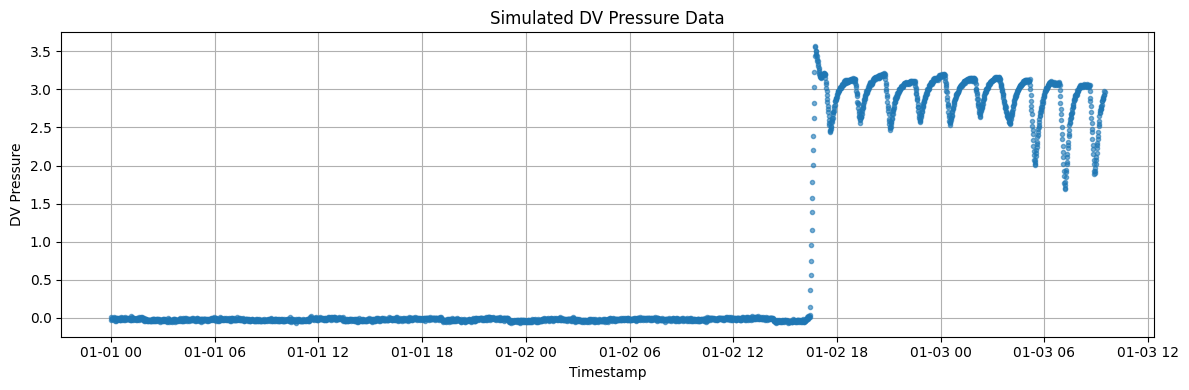

In [2536]:
plt.figure(figsize=(12, 4))
plt.plot(simulated_df3["timestamp"], simulated_df3["DV_pressure_with_drift"], '.', alpha=0.6)
plt.title("Simulated DV Pressure Data")
plt.xlabel("Timestamp")
plt.ylabel("DV Pressure")
plt.grid(True)
plt.tight_layout()
plt.show()

FAILURE 3 ORIGINAL BEHAVIOR

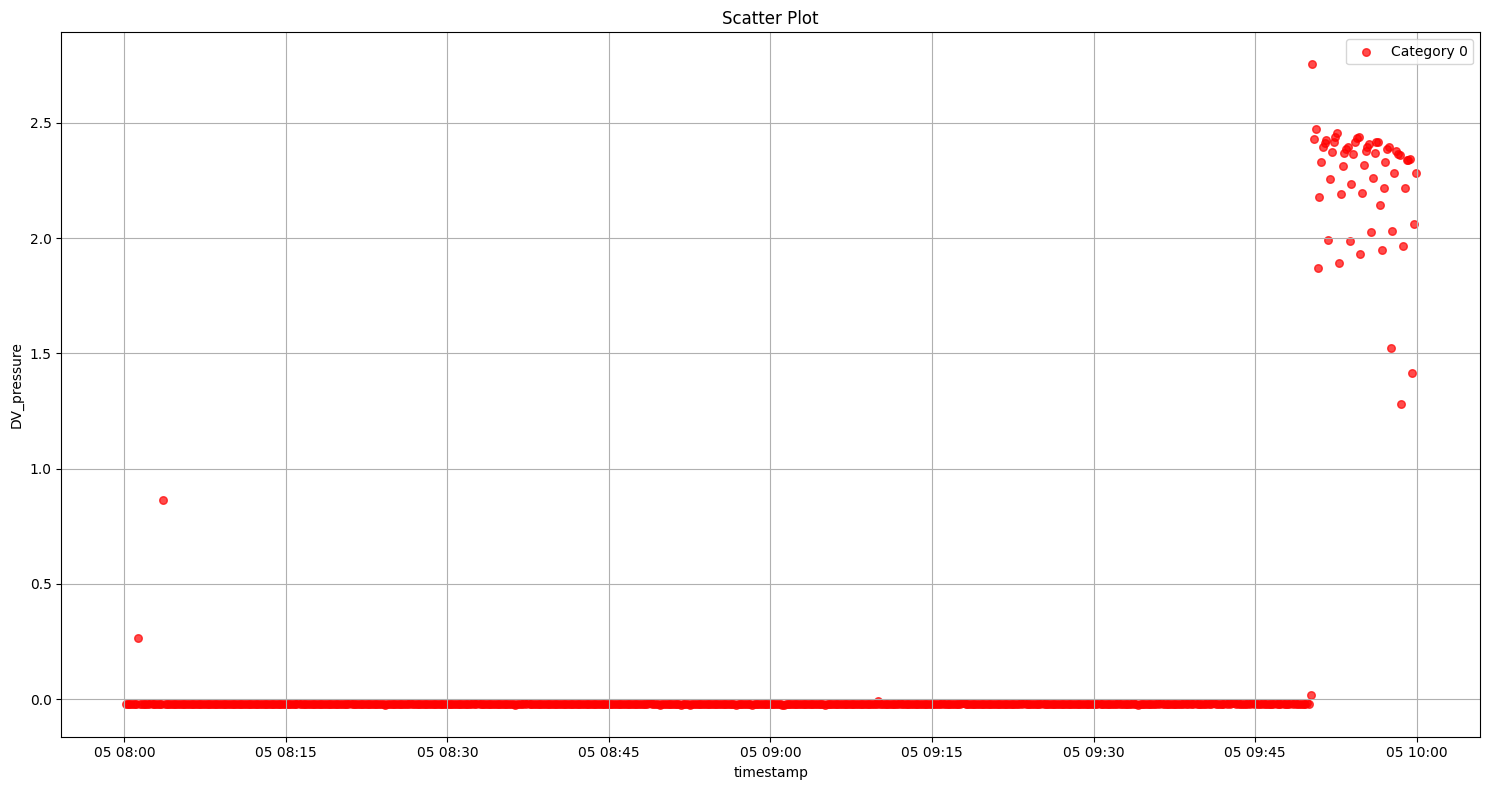

In [2537]:
mpt.plot_columns_failure_comparison(mpt.filter_rows_between_the_given_timestamps(df, "2020-06-05 08:00:00", "2020-06-05 10:00:00"), "timestamp", "DV_pressure", "condition")

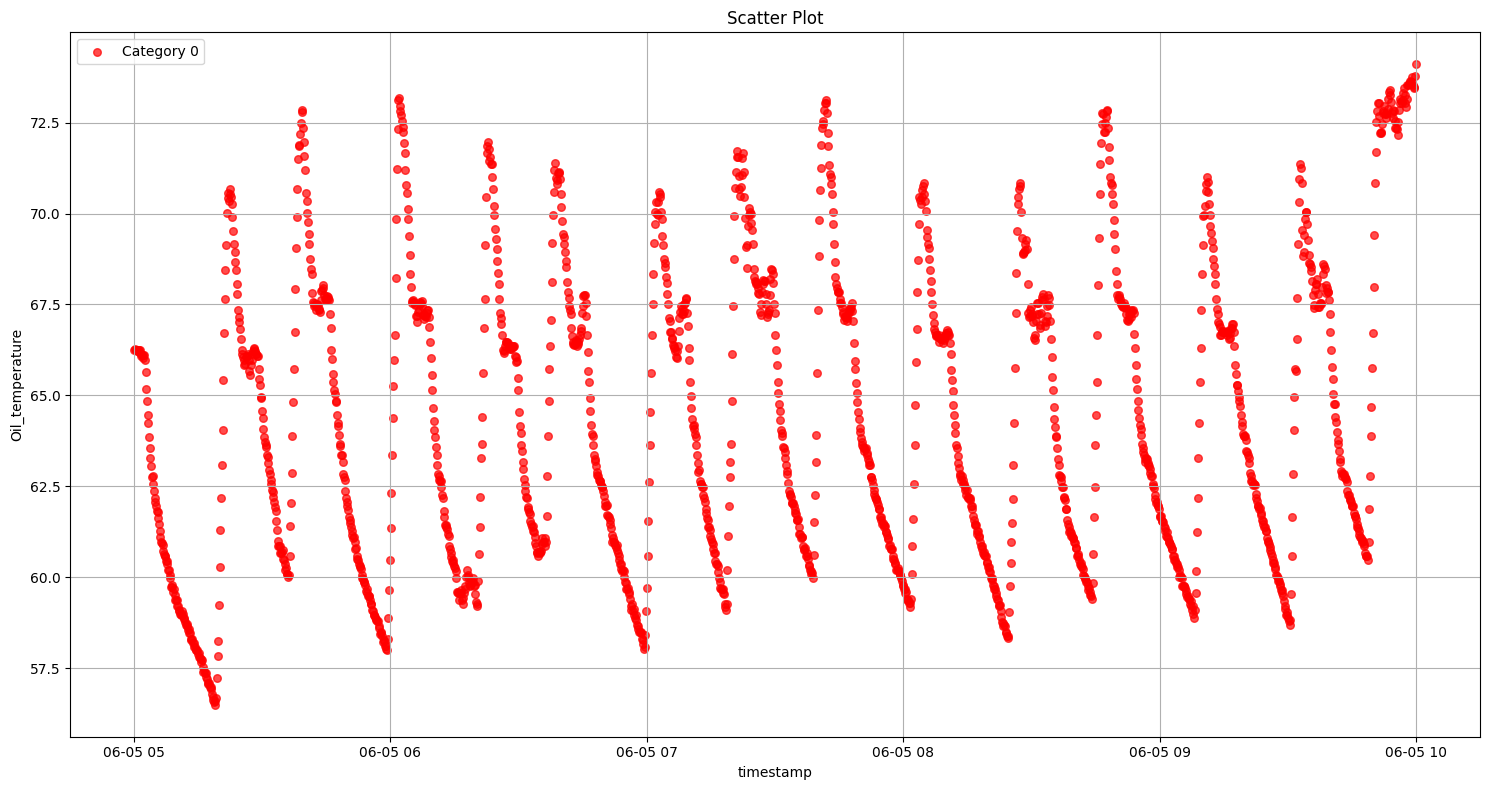

In [2538]:
mpt.plot_columns_failure_comparison(mpt.filter_rows_between_the_given_timestamps(df, "2020-06-05 05:00:00", "2020-06-05 10:00:00"), "timestamp", "Oil_temperature", "condition")

FAILURE 4 ORIGINAL BEHAVIOR

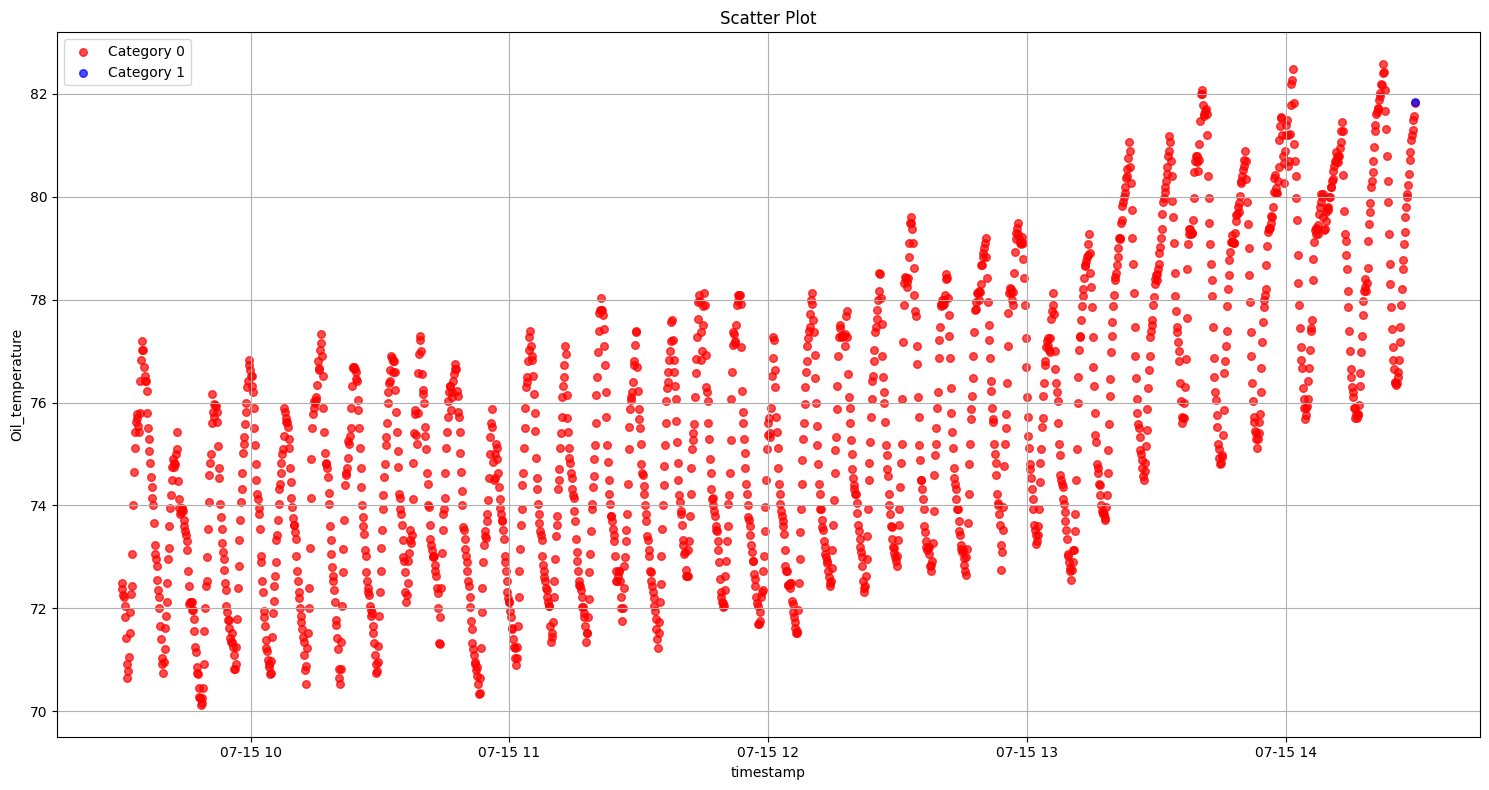

In [2539]:
mpt.plot_columns_failure_comparison(mpt.filter_rows_between_the_given_timestamps(df, "2020-07-15 09:30:00", "2020-07-15 14:30:00"), "timestamp", "Oil_temperature", "condition")

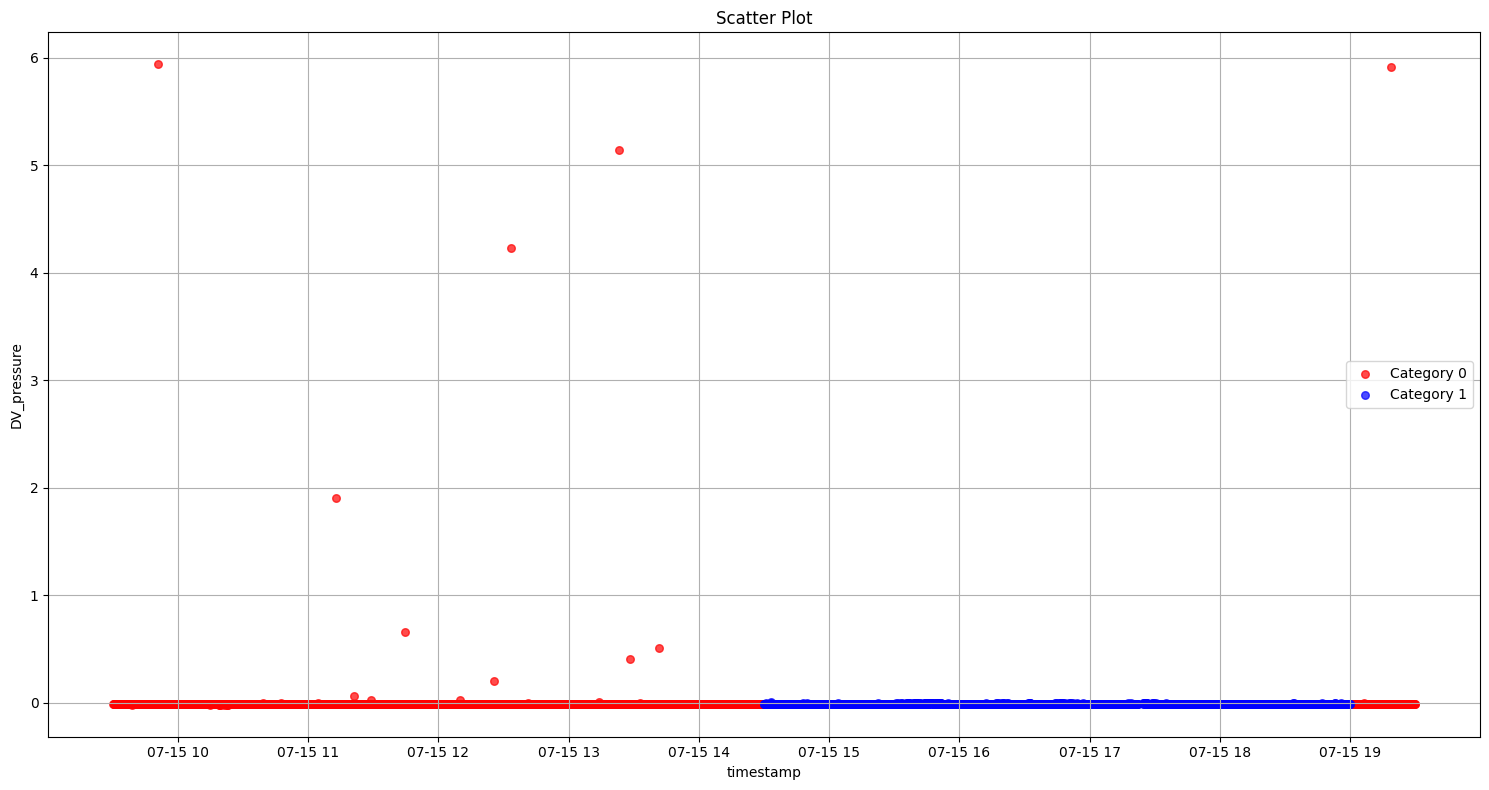

In [2540]:
mpt.plot_columns_failure_comparison(mpt.filter_rows_between_the_given_timestamps(df, "2020-07-15 09:30:00", "2020-07-15 19:30:00"), "timestamp", "DV_pressure", "condition")

Motor Current Simulation

In [2541]:
failure_start_idx = int(len(simulated_df3) * 0.8)
failure_duration = len(simulated_df3) - failure_start_idx

# Create a smooth failure signal starting around 5 and drifting up slightly
base_level = 5
drift_curve = base_level + 0.5 * (np.linspace(0, 1, failure_duration) ** 2)  # slow rise
noise = np.random.normal(0, 0.2, size=failure_duration)  # small jitter

# Combine drift + noise
failure_signal = drift_curve + noise

In [2542]:
simulated_df3["Motor_current_with_drift"] = simulated_df3["Motor_current"]

In [2543]:
# Overwrite the Motor_current signal during failure region
simulated_df3.loc[failure_start_idx:, "Motor_current_with_drift"] = failure_signal

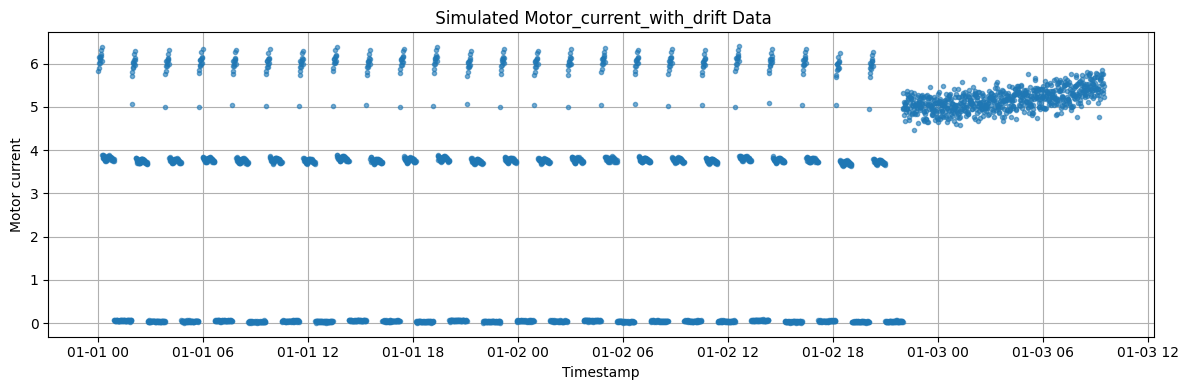

In [2544]:
plt.figure(figsize=(12, 4))
plt.plot(simulated_df3["timestamp"], simulated_df3["Motor_current_with_drift"], '.', alpha=0.6)
plt.title(" Simulated Motor_current_with_drift Data")
plt.xlabel("Timestamp")
plt.ylabel("Motor current")
plt.grid(True)
plt.tight_layout()
plt.show()

UPDATED DATAFRAME

In [2545]:
df_sim = simulated_df3[["Oil_temperature_with_drift", "Motor_current_with_drift", "DV_pressure_with_drift"]]

In [2546]:
import numpy as np

def add_gaussian_noise(df, columns, std=0.01):
    noisy_df = df.copy()
    for col in columns:
        noise = np.random.normal(loc=0, scale=std, size=len(df))
        noisy_df[col] += noise
    return noisy_df


In [2547]:
df_final = add_gaussian_noise(df_sim, columns=["DV_pressure_with_drift", "Oil_temperature_with_drift", "Motor_current_with_drift"], std=0.02)


In [2548]:
df_final.head()

,Oil_temperature_with_drift,Motor_current_with_drift,DV_pressure_with_drift
0,64.688298,5.798097,0.022882
1,65.318844,5.903707,0.002533
2,66.119325,6.023416,0.012385
3,67.189213,6.158715,-0.000932
4,68.027565,6.102771,0.019187


In [2549]:
df_final.shape

(3450, 3)

In [2550]:
# Step 1: Rename df_final columns to match original DataFrame
df_final.columns = ["Oil_temperature", "Motor_current", "DV_pressure"]
df_final.head()


,Oil_temperature,Motor_current,DV_pressure
0,64.688298,5.798097,0.022882
1,65.318844,5.903707,0.002533
2,66.119325,6.023416,0.012385
3,67.189213,6.158715,-0.000932
4,68.027565,6.102771,0.019187


In [2551]:
df_final.isna().sum()

Oil_temperature    0
Motor_current      0
DV_pressure        0
dtype: int64

In [2552]:
# Step 2: Trim the original DataFrame
rows_to_replace = df_final.shape[0]
df_trimmed = df.iloc[:-rows_to_replace].copy()

# Step 3: Replace only the relevant columns in the final segment
df_tail = df.iloc[-rows_to_replace:].copy()
# Replace only the 'Oil_temperature' column from df_final into the original tail
df_tail["Oil_temperature"] = df_final["Oil_temperature"].values
df_tail["Motor_current"] = df_final["Motor_current"].values
df_tail["DV_pressure"] = df_final["DV_pressure"].values

# Step 4: Concatenate the updated DataFrame
df_updated = pd.concat([df_trimmed, df_tail], ignore_index=True)

In [2553]:
df_updated.tail()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,condition
1516943,2020-09-01 03:59:10,-0.014,8.918,8.906,2.899215,8.918,70.061514,5.783670,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1516944,2020-09-01 03:59:20,-0.014,8.904,8.888,2.884473,8.904,70.075981,5.578218,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1516945,2020-09-01 03:59:30,-0.014,8.890,8.876,2.962710,8.892,69.968322,5.353190,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1516946,2020-09-01 03:59:40,-0.012,8.876,8.864,2.963975,8.878,69.979623,5.263964,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1516947,2020-09-01 03:59:50,-0.014,8.860,8.848,2.962566,8.864,69.920365,5.469905,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0


In [2554]:
df.tail()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,condition
1516943,2020-09-01 03:59:10,-0.014,8.918,8.906,-0.022,8.918,59.675,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1516944,2020-09-01 03:59:20,-0.014,8.904,8.888,-0.020,8.904,59.600,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1516945,2020-09-01 03:59:30,-0.014,8.890,8.876,-0.022,8.892,59.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1516946,2020-09-01 03:59:40,-0.012,8.876,8.864,-0.022,8.878,59.550,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1516947,2020-09-01 03:59:50,-0.014,8.860,8.848,-0.022,8.864,59.475,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0


In [2555]:
df_updated.to_csv("df_updated_3.csv")

MODEL RUN

In [2556]:
import pandas as pd
import importlib
import mpt_functions as mpt
importlib.reload(mpt)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from datetime import datetime, timedelta
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score



f1_start = "2020-04-18 00:00:00"
f1_finish = "2020-04-18 23:59:00"
f2_start = "2020-05-29 23:30:00"
f2_finish = "2020-05-30 06:00:00"
f3_start = "2020-06-05 10:00:00"
f3_finish = "2020-06-07 14:30:00"
f4_start = "2020-07-15 14:30:00"
f4_finish = "2020-07-15 19:00:00"

# **************************************************************************************************************#

path = "/Users/esramahmud/Graduation-Project/df_updated_3.csv"
#path = "/Users/esramahmud/IE440/MetroPT3(AirCompressor).csv"
df = mpt.get_the_data_and_convert_datetime(path)

#

df = mpt.drop_a_column(df, "Unnamed: 0")

#

df = df.assign(condition=0)
df = mpt.change_the_values_by_applying_a_time_filter(df, f1_start, f1_finish, "condition", 1)
df = mpt.change_the_values_by_applying_a_time_filter(df, f2_start, f2_finish, "condition", 1)
df = mpt.change_the_values_by_applying_a_time_filter(df, f3_start, f3_finish, "condition", 1)
df = mpt.change_the_values_by_applying_a_time_filter(df, f4_start, f4_finish, "condition", 1)




#

all_column_names = df.columns.to_list()

name_of_the_categorical_columns = ['COMP', 'DV_eletric', 'Towers',
       'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']

name_of_the_numerical_columns =['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs',
       'Oil_temperature', 'Motor_current']

target_column = df["condition"]

#

df_scaled = mpt.scale_columns(df, name_of_the_numerical_columns)




datetime_column = df.columns[0]  # Adjust this if your datetime column isn't the first one

# Add month and week number columns
df_scaled['number_of_the_month'] = df_scaled[datetime_column].dt.month
df_scaled['number_of_the_week'] = df_scaled[datetime_column].dt.isocalendar().week
df_scaled["number_of_the_day"] = df_scaled[datetime_column].dt.isocalendar().day


df_scaled['number_of_the_month'] = df_scaled['number_of_the_month'].astype('float64')
df_scaled['number_of_the_week'] = (df_scaled['number_of_the_week'].astype('float64') % 4) + 1
df_scaled['number_of_the_day'] = df_scaled['number_of_the_day'].astype('float64')




def aggregate(df,aggregation_size, n1, n2, m3, n4, n5, n6, n7, n8):
    

    result1 = mpt.get_the_probabilities_with_logistic_regressionn(df, n1, n2, m3, n4, n5, n6, n7, n8, "yes")

    probabilities = result1[0]
    y_test = result1[1]

    #probabilities = mpt.get_the_probabilities_with_logistic_regressionn(df, n1, n2, m3, n4, n5, n6, n7, n8, "yes")[0]
    #y_test = mpt.get_the_probabilities_with_logistic_regressionn(df, n1, n2, m3, n4, n5, n6, n7, n8, "no")[1]
    df_ed = pd.DataFrame({"proba": probabilities, "condition": y_test})
    result = mpt.group_rows_by_condition(df_ed, aggregation_size)
    return result


def agg_new_deneme(df,aggregation_size, n1, n2, m3, n4, n5, n6, n7, n8, use1, use2, use3, use4, sliding_amount):

    result1 = mpt.get_the_probabilities_with_logistic_regressionn_new(df, n1, n2, m3, n4, n5, n6, n7, n8, "yes", use1, use2, use3, use4)

    probabilities = result1[0]
    y_test = result1[1]

    df_ed = pd.DataFrame({"proba": probabilities, "condition": y_test})
    result = mpt.group_rows_by_condition_sliding(df_ed, aggregation_size, sliding_amount)
    return result


def agg_random_forest(n, f, d, s, l, df, aggregation_size, n1, n2, m3, n4, n5, n6, n7, n8, use1, use2, use3, use4, sliding_amount, graph):


    result1 = mpt.get_the_probabilities_with_random_forest_new_new(n, f, d, s, l, df, n1, n2, m3, n4, n5, n6, n7, n8, "yes", use1, use2, use3, use4, graph)


    probabilities = result1[0]
    y_test =result1[1]
    
    df_ed = pd.DataFrame({"proba": probabilities, "condition": y_test})
    result = mpt.group_rows_by_condition_sliding(df_ed, aggregation_size, sliding_amount)

    feature_importances = result1[2]

    return result, feature_importances, y_test


def agg_single_tree(df,aggregation_size, n1, n2, m3, n4, n5, n6, n7, n8, use1, use2, use3, use4, sliding_amount):


    result1 = mpt.get_the_probabilities_with_single_tree(df, n1, n2, m3, n4, n5, n6, n7, n8, "yes", use1, use2, use3, use4)


    probabilities = result1[0]
    y_test =result1[1]
    
    df_ed = pd.DataFrame({"proba": probabilities, "condition": y_test})
    result = mpt.group_rows_by_condition_sliding(df_ed, aggregation_size, sliding_amount)
    return result



def plot_probabilities_by_condition(df, threshold): # tekrar yazılacak

    print(1)
    print(df)

    indices = np.arange(df.shape[0])
    
    # Create figure
    plt.figure(figsize=(8, 5))
    
    # Plot points with condition=0 and proba <= threshold in blue
    mask_0_below = (df['condition'] == 0) & (df['proba'] <= threshold)
    plt.scatter(indices[mask_0_below], df.loc[mask_0_below, 'proba'], 
                color='blue', alpha=0.7, label='condition=0')
    
    # Plot points with condition=0 and proba > threshold in red
    mask_0_above = (df['condition'] == 0) & (df['proba'] > threshold)
    plt.scatter(indices[mask_0_above], df.loc[mask_0_above, 'proba'], 
                color='red', alpha=0.7, label=f'condition=0, proba>{threshold}')
    
    # Plot points with condition=1 in black
    mask_1 = df['condition'] == 1
    plt.scatter(indices[mask_1], df.loc[mask_1, 'proba'], 
                color='black', alpha=0.7, label='condition=1')

    
    # Add labels and title
    plt.title('Probablity of Failure')
    plt.xlabel('Index')
    plt.ylabel('Probability')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    
    # Show the plot
    plt.tight_layout()
    plt.show()


df_back_up = df_scaled.copy()

                     Importance
DV_pressure            0.896048
number_of_the_day      0.070067
Oil_temperature        0.031348
H1                     0.001762
Reservoirs             0.000711
Motor_current          0.000064
number_of_the_month    0.000000
R-squareddd: 0.9953469687325254
F-Value Like: 3066146.7874215967
model preditions
[0 0 0 ... 0 0 0]
model proba
[0.         0.         0.         ... 0.01886792 0.01886792 0.01886792]
        model_predictions  model_probablities
0                       0            0.000000
1                       0            0.000000
2                       0            0.000000
3                       0            0.000000
4                       0            0.000000
...                   ...                 ...
649822                  0            0.018868
649823                  0            0.018868
649824                  0            0.018868
649825                  0            0.018868
649826                  0            0.018868

[649827

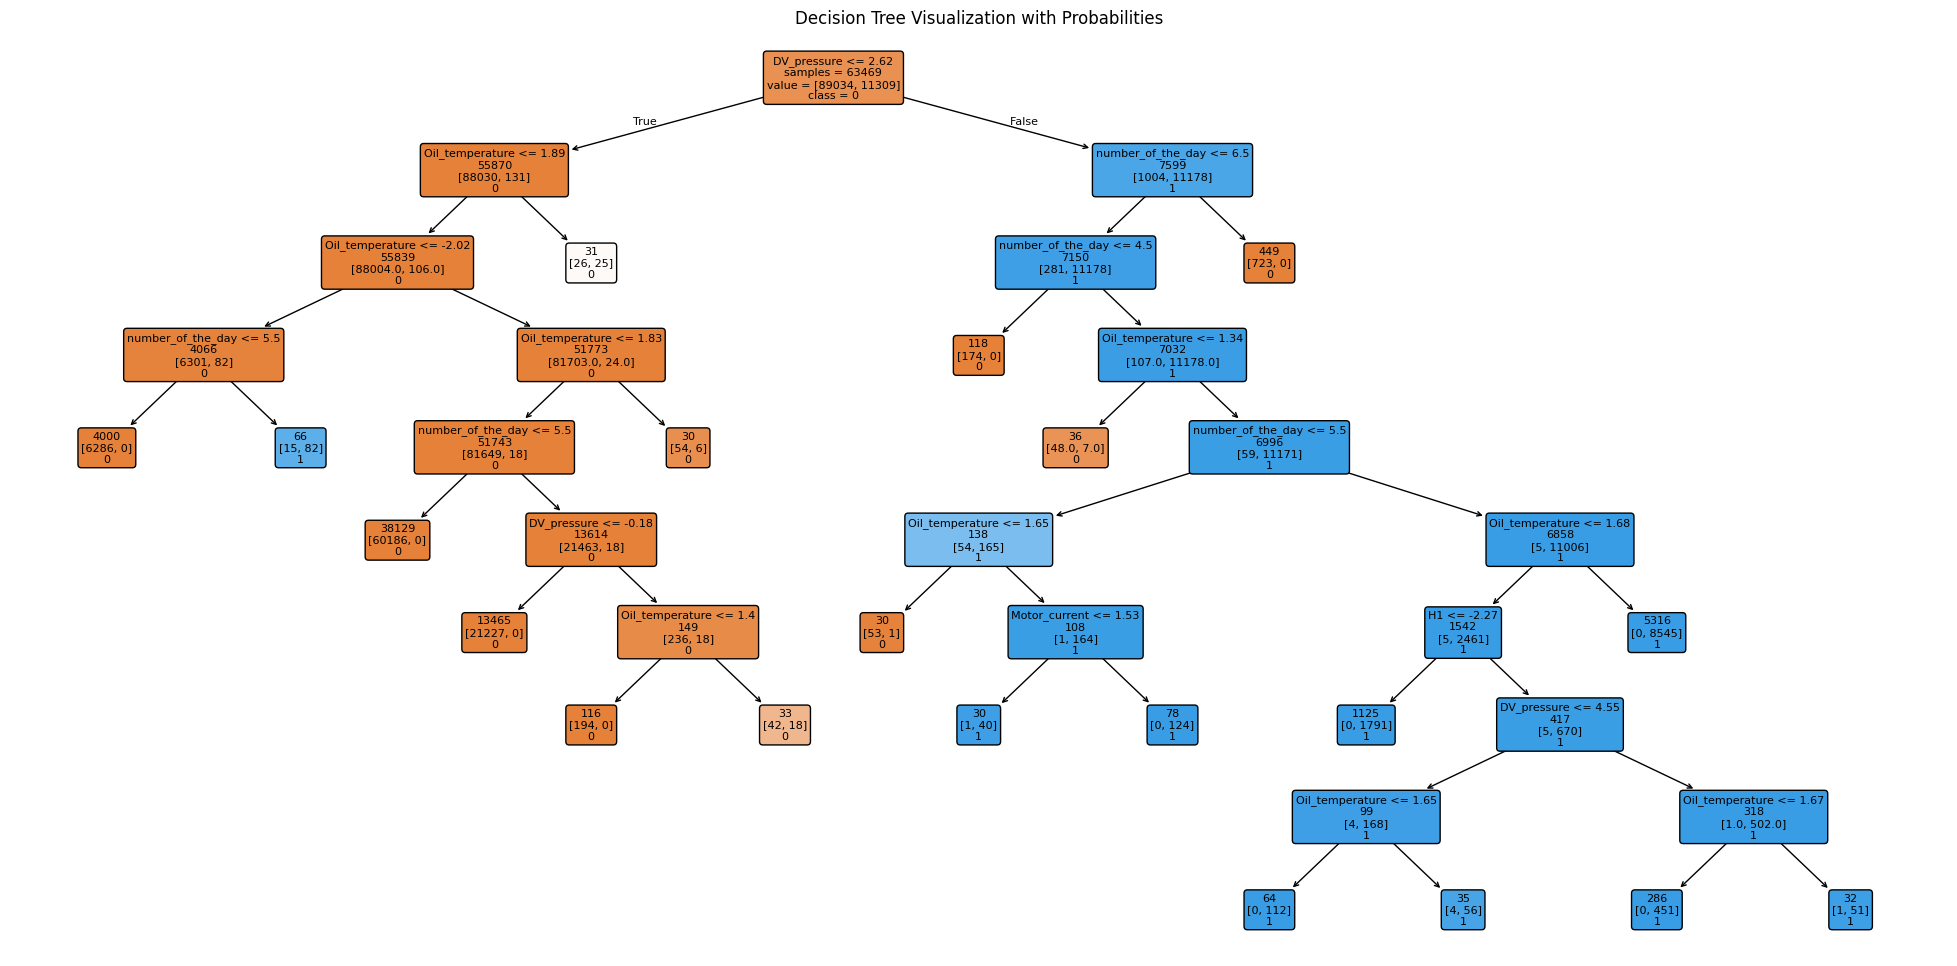

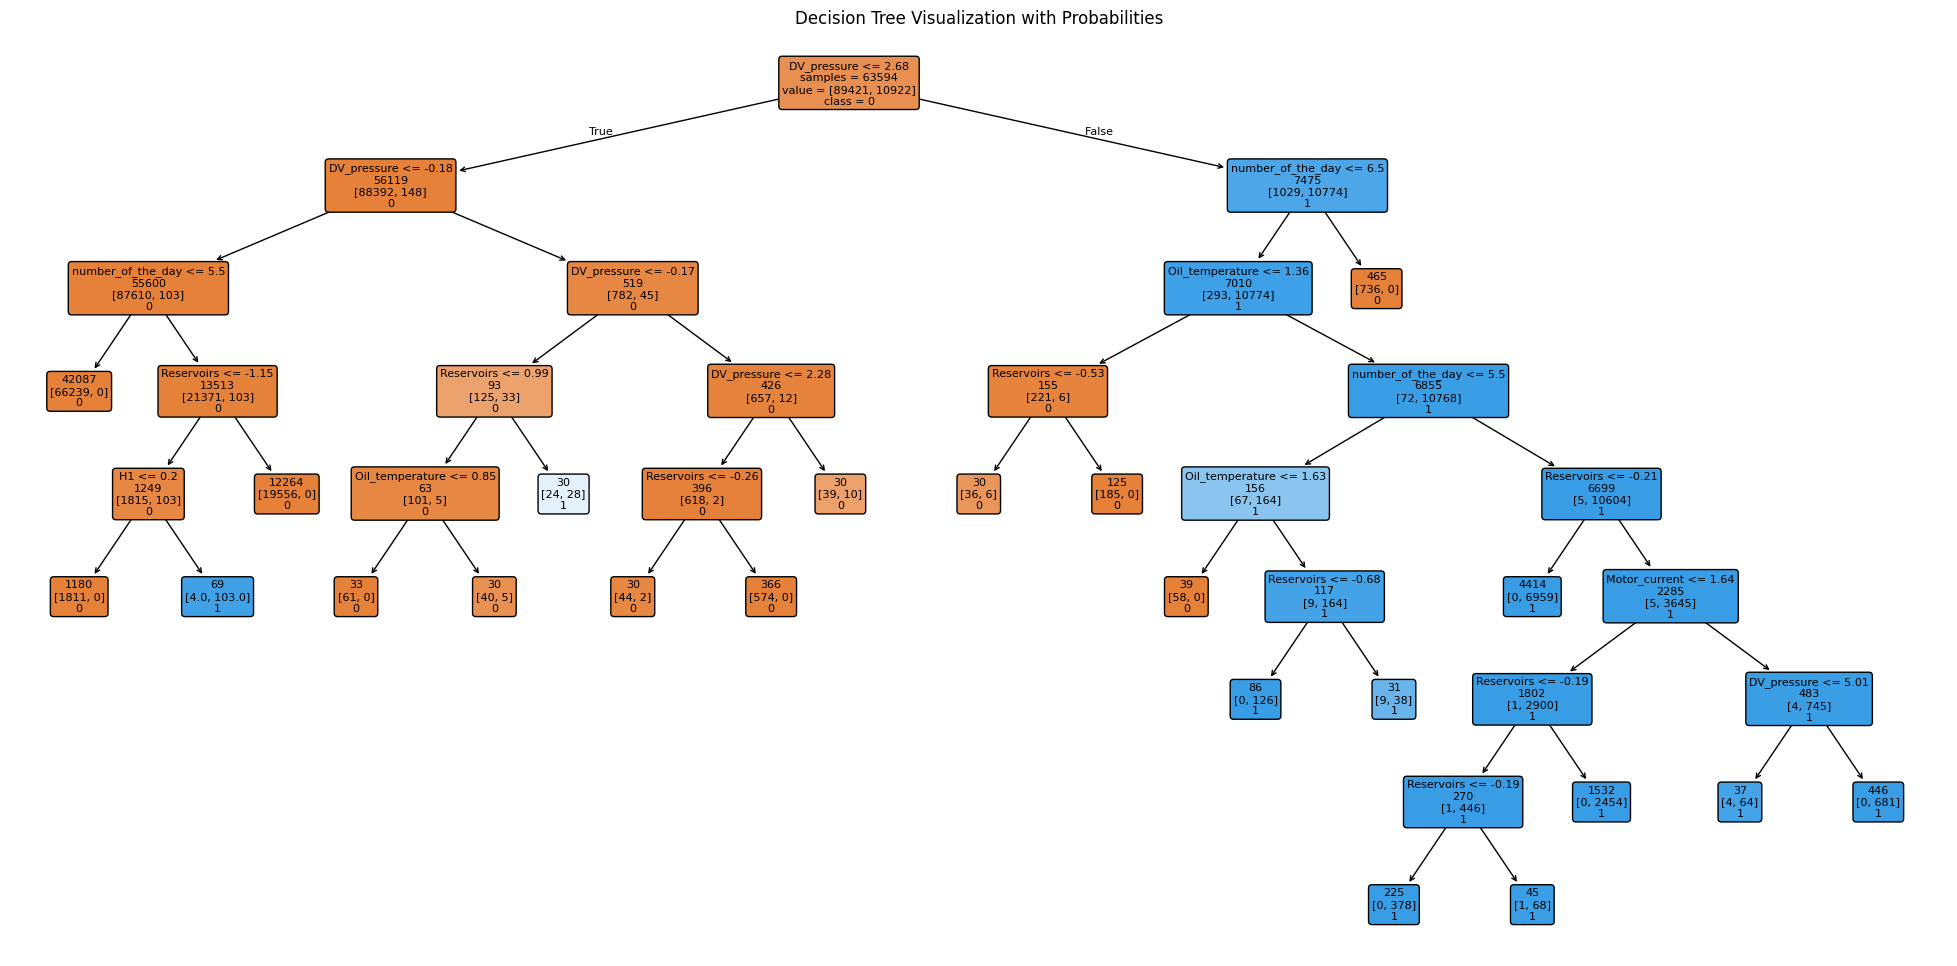

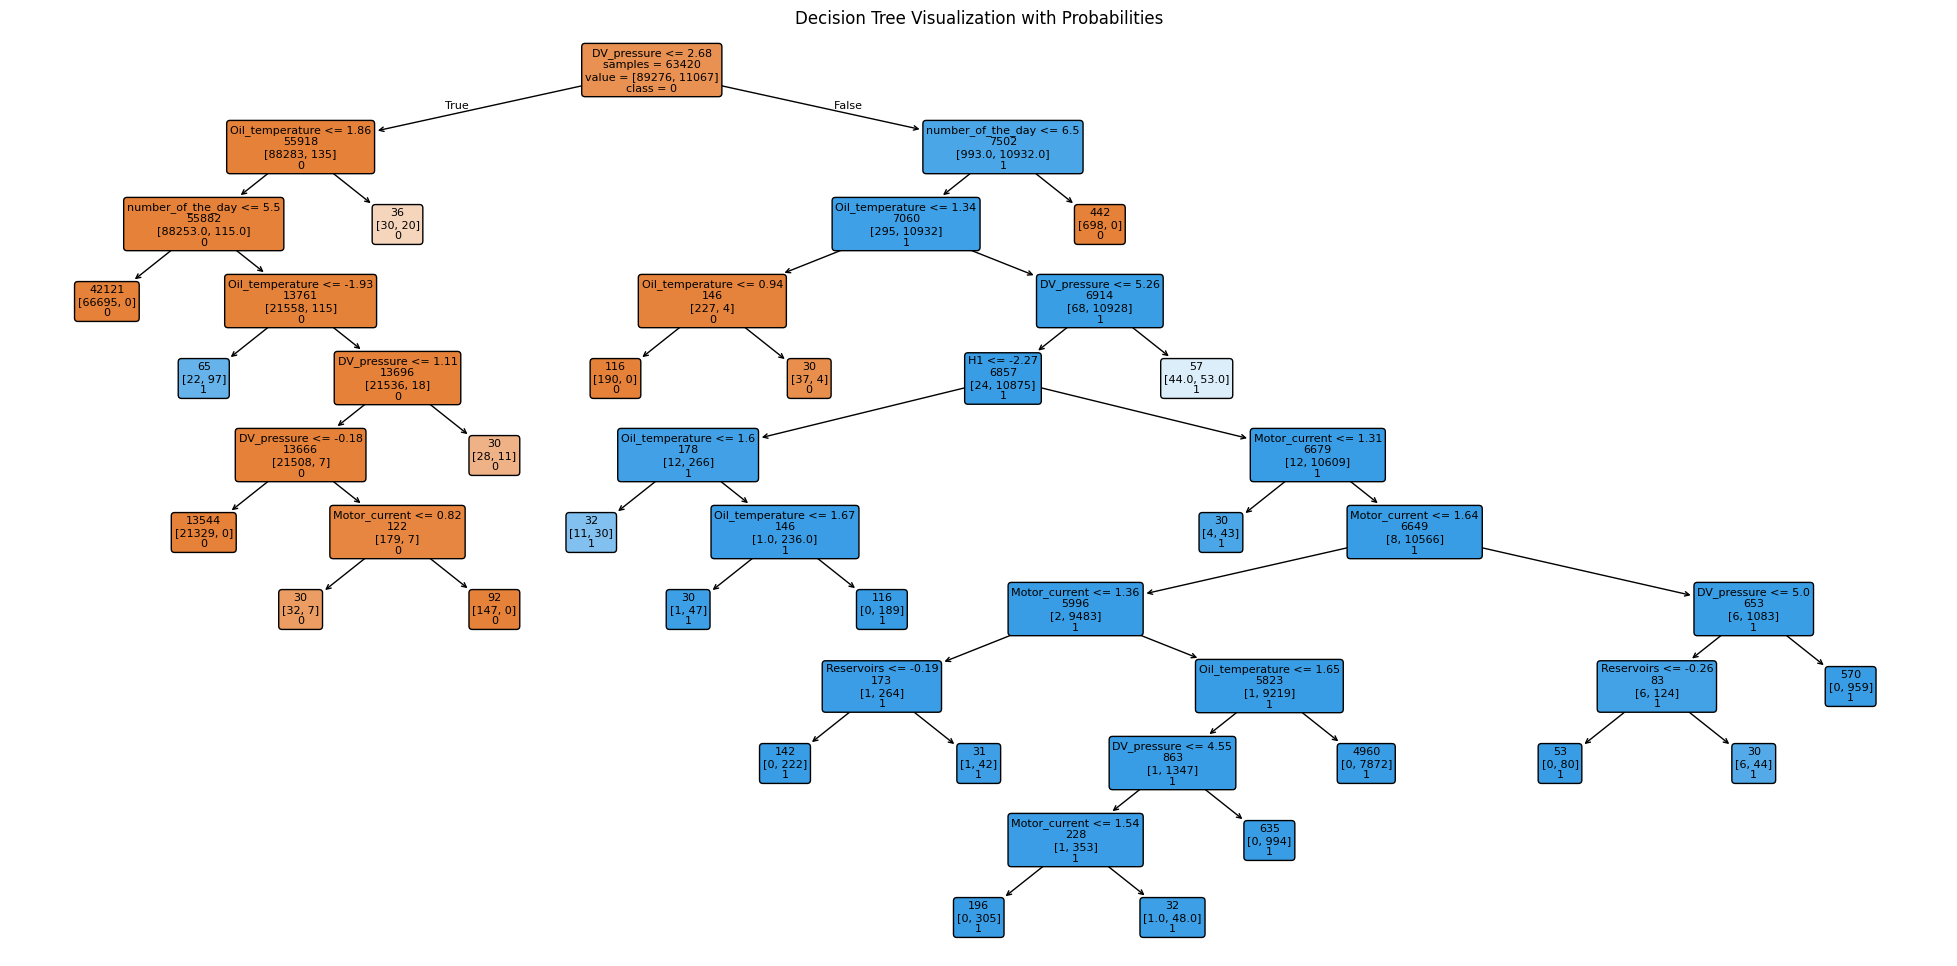

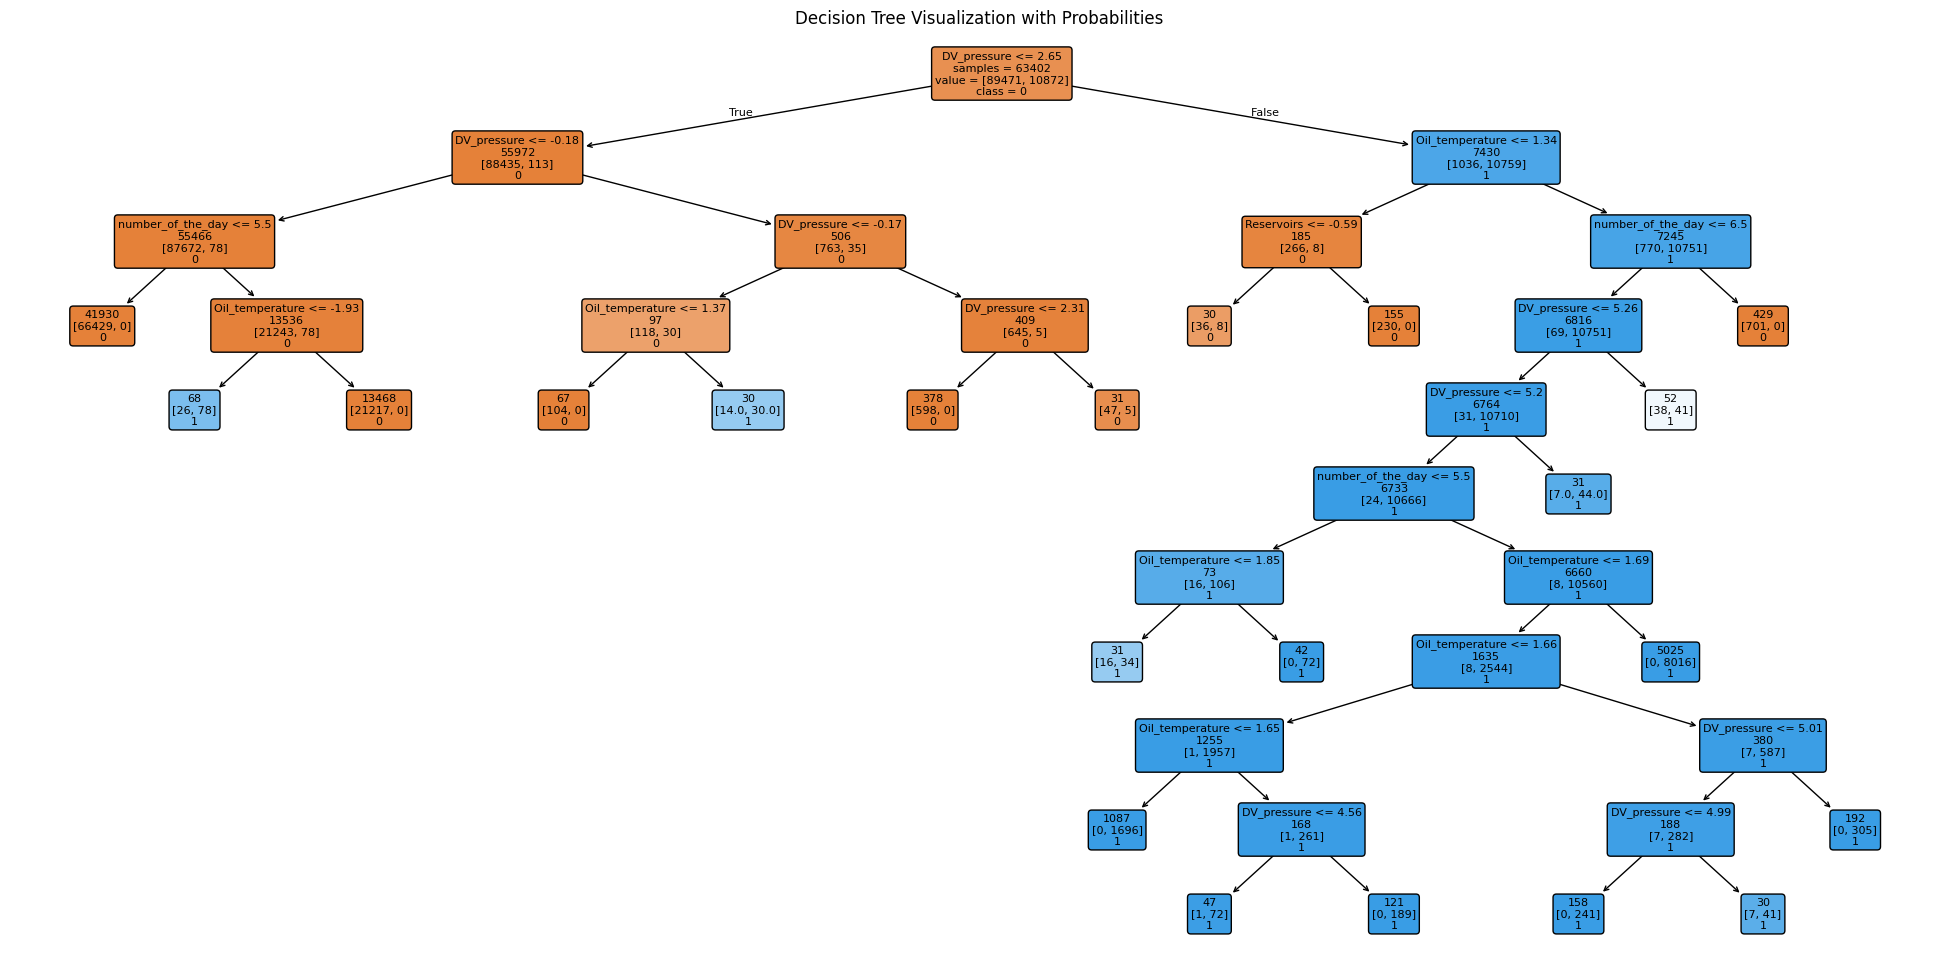

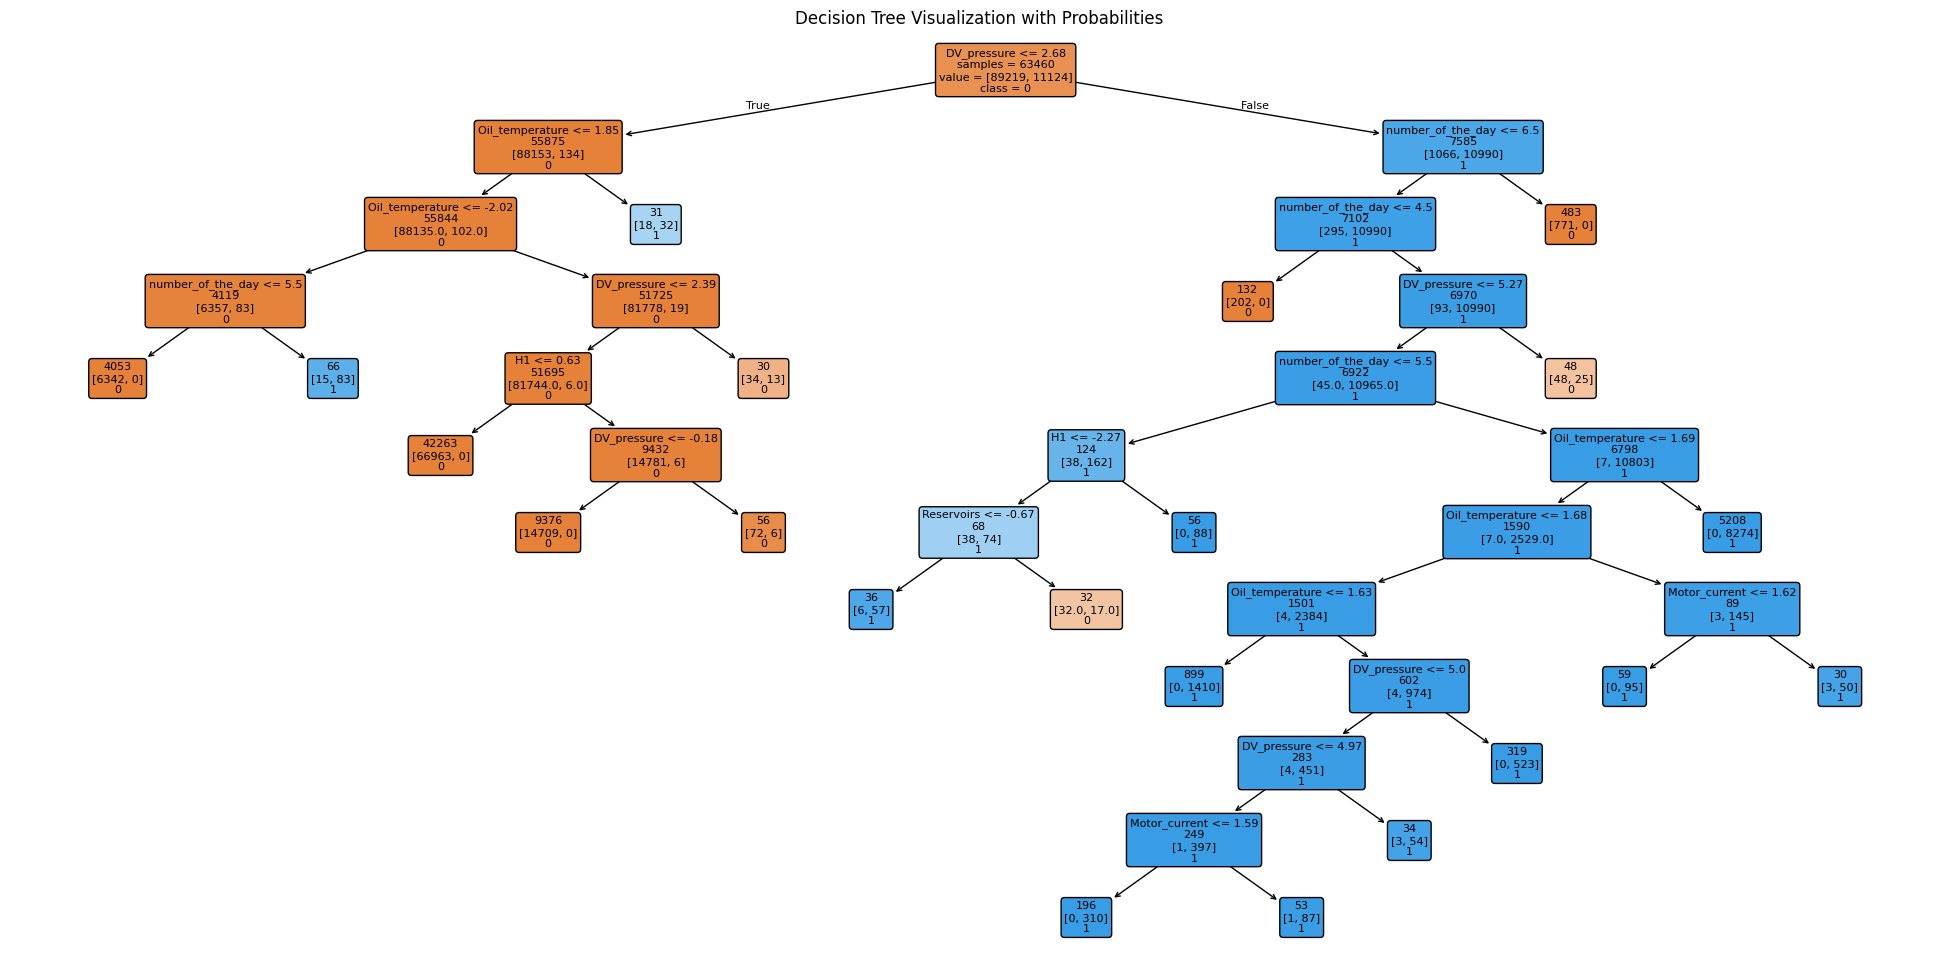

group_id       6495.000000
start_row    649500.000000
end_row      649826.000000
row_count       327.000000
proba             0.544619
condition         0.000000
Name: 6495, dtype: float64
1
      group_id  start_row  end_row  row_count     proba  condition
0            0          0      399        400  0.000052          0
1            1        100      499        400  0.000052          0
2            2        200      599        400  0.000052          0
3            3        300      699        400  0.000052          0
4            4        400      799        400  0.000000          0
...        ...        ...      ...        ...       ...        ...
6491      6491     649100   649499        400  0.456110          0
6492      6492     649200   649599        400  0.448911          0
6493      6493     649300   649699        400  0.498155          0
6494      6494     649400   649799        400  0.553761          0
6495      6495     649500   649826        327  0.544619          0

[649

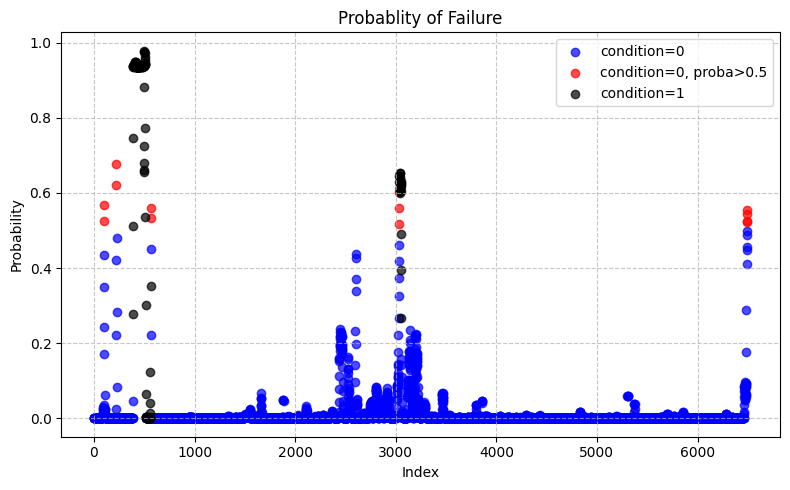

In [2557]:
dataframe = df_back_up.copy()


dataframe = dataframe.drop(labels = [
    "DV_eletric", 
    "TP2",   
    "MPG", 
    "LPS", 
    "Pressure_switch", 
    "Oil_level", 
    "Caudal_impulses", 
    "number_of_the_week",
    "Towers",
    "TP3",
    "COMP",
], axis = 1)



def fit_the_model(i, j, k, l):
    
    aggregation_size = 400

    treshold_probability = 0.5

    aggregated_probabilities, f1, a = agg_random_forest(i, 5, j, k, l, dataframe, aggregation_size, 4, 2, 4, 2, 5, 18, 18, 50, "yes", "yes", "no", "no", 100, "yes")
    print(aggregated_probabilities.iloc[-1])

    plot_probabilities_by_condition(aggregated_probabilities, treshold_probability)


fit_the_model(5, 15, 60, 30)